# 정확도 (Accuracy)

정확도 = 예측 경과가 동일한 데이터 건수 / 전체 예측 데이터 건수

정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표<br>
하지만 이진분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡 할 수 있기 떄문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.

In [16]:
import sklearn
print(sklearn.__version__)

1.2.2


## 사이킷런으로 수행하는 타이타닉 생존자 예측

In [17]:
#코랩에서 드라이브 연결

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# CSV 파일 경로
csv= '/content/drive/MyDrive/머신러닝/titanic_train.csv'

# CSV 파일 열기
titanic_df = pd.read_csv(csv)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [41]:
# 칼럼의 타입 확인
print('\n ### 학습 데이터 정보### \n')
print(titanic_df.info())


 ### 학습 데이터 정보### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [42]:
# Null값을 평균 or 고정값으로 변경.
# Age의 경우 평균 나이, 나머지 컬럼은 N 값으로 변경

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null값 갯수', titanic_df.isnull().sum().sum()) #Null값 없는지 체크

데이터 세트 Null값 갯수 0


In [44]:
# 문자열 피쳐는 Sex, Cabin,  Embarked 만 남았습니다. 각 피쳐들의 값 분류 살펴보기

print('sex 값 분포:', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포: \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n',titanic_df['Embarked'].value_counts())
# Cabin은  N이 687건이며 속성값의 정리가 필요해 보인다.
# C23 C25 C27  처럼 여러cabin이 한꺼번에 표기된 값이 4건이나 있다.
# 선실 등급을 나타내는 첫번째 알파벳이 중요해보인다.

sex 값 분포: male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [45]:
# Cabin 속성의 경우 앞 문자만 추출

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # 각 행의 값에서 첫번째 글자만 남기고 나머지는 삭제
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [46]:
# 성별에 따른 생존자 수를 비교
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
# 'Sex'와 'Survived' 열을 기준으로 데이터를 그룹화
# 각 그룹 내에서 'Survived' 열의 값이 나타나는 횟수를 계산 = ['Survived'].count()사용

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

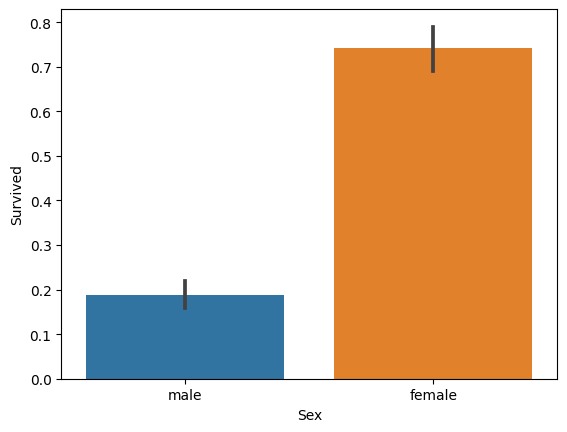

In [48]:
# 위 결과를 시각화
# 성별에 따른 생존비율 시각화
import seaborn as sns
sns.barplot(x = 'Sex', y = 'Survived',data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

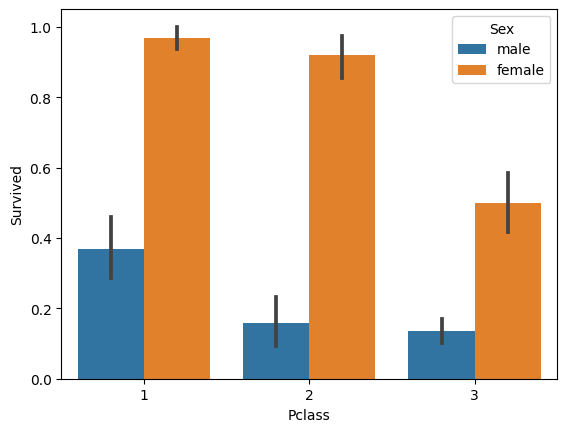

In [49]:
# 객실 등글별 성별에 따른 생존률 시각화

sns.barplot(x = 'Pclass', y='Survived', hue = 'Sex', data = titanic_df)

- 1,2등실에 따른 생존 확률의 차이가 크지는 않으나, 3등실의 경우 생존 확률이 상대적으로 많이 떨어진다.
- 남성의 경우 1등석일 경우 2,3등급의 생존 확률보다 월등히 높다.

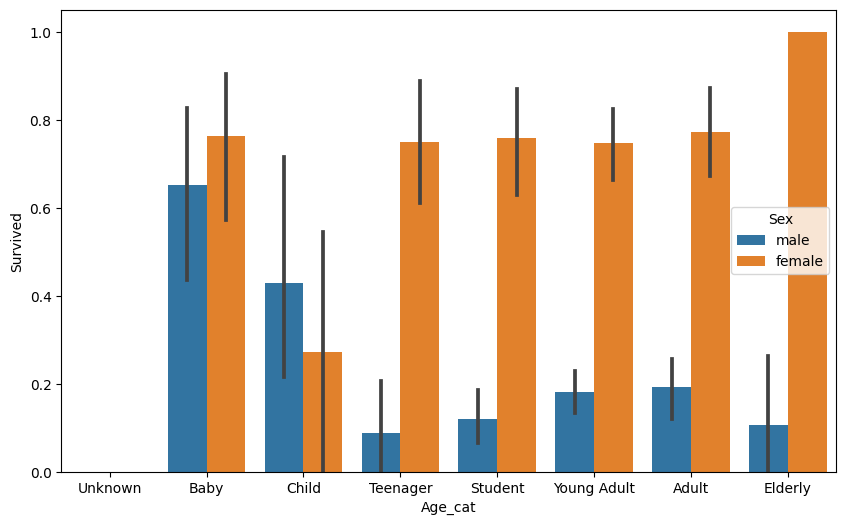

In [53]:
import matplotlib.pyplot as plt


# 연령에 따른 생존률 시각화

# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

- BABY의 경우 비교적 생존률 높았음.
- 어린 여자Child의 경우 다른 연령대에 비해 생존률이 낮았다.
- 여자 Elderㅣy의 경우 생존률이 매우 높다.
<br> = Sex,Age,Pclass가 중요한 피쳐임을 확인.
<br>
남아있는 문자열 카테고리를 숫자형 카테고리 피처로 변환.
- 레이블 인코딩 적용
   - 값의 유형에 따라 0~(카테고리 유형 수 -1)까지의 값으로 변환.<br>
- 사이킷런의 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프레임워크 API인 fit(), transform()으로 데이터를 변환<br>

In [55]:
# 여러 칼럼을 encode_features() 함수를 새로 생성해 한번에 변환해보자

from sklearn import preprocessing

def encode_features(dataDF):
  features = ['Cabin', 'Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


'Cabin', 'Sex','Embarked' 속성이 숫자형으로 변경되었다

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


#### MyDummyClassifier()
=더미(dummy) 분류기
<br>
**입력 데이터에 기반하여 예측을 만들고, 일반적으로 무작위로 또는 미리 정의된 규칙에 따라 클래스를 할당**합니다.<br>
**실제 분류 모델과 비교하여 얼마나 잘 작동하는지를 확인하기 위해 사용**될 수 있습니다<br><br>::
더미 분류기는 실제 데이터에 대한 도메인 지식 없이도 쉽게 구현할 수 있으며, 간단한 분류 작업에서는 유용한 기준 모델로 사용될 수 있습니다. 하지만 더미 분류기는 실제 데이터의 복잡성과 다양성을 반영하지 못하며, 실전에서는 정확한 예측을 제공하지 못하는 경우가 많습니다. 따라서 실제 문제에 대해 더 정교한 분류 모델을 사용하는 것이 일반적입니다.

In [38]:
import numpy as np
from sklearn.base import BaseEstimator as BE

class MyDummyClassifier(BE):
  # fit() 메소드는 아무것도 학습하지 않음.
  def fit(self, X, y=None):
    pass

#predict() 메소드는 단순히 Sex feature가 1 이면 0, 그렇지 않으면 1로 예측함.
  def predict(self, X):
    pred = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
       if X['Sex'].iloc[i] ==1:
         pred[i] = 0
       else :
         pred[i] = 1

       return pred

# 여기서 생성한 MyDummyClassifier()를 이용해 생존자 예측 수행.


In [39]:
#MyDummyClassifier 를 이용한 학습/예측/평가

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재 로딩, 데이터 가공, 학습데이터 / 테스트 데이터 분할
titanic_df = pd.read_csv(csv)
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)  # transform_features 함수 적용

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.6145


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재 로딩, 데이터 가공, 학습데이터 / 테스트 데이터 분할
csv= '/content/drive/MyDrive/머신러닝/titanic_train.csv'
titanic_df = pd.read_csv(csv)
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)  # transform_features 함수 적용

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypreds = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypreds)))


Dummy Classifier의 정확도는: 0.6145
